# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Your answer here`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [ ]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [ ]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [ ]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [3]:
missing_train = df_train.isnull().sum()
missing_test = df_test.isnull().sum()

print("Пропуски в тренировочном датасете:")
print(missing_train[missing_train > 0])

print("\nПропуски в тестовом датасете:")
print(missing_test[missing_test > 0])

Пропуски в тренировочном датасете:
mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64

Пропуски в тестовом датасете:
mileage      19
engine       19
max_power    19
torque       19
seats        19
dtype: int64


In [4]:
duplicates_train = df_train.duplicated().sum()
duplicates_test = df_test.duplicated().sum()

print(f"Дубликаты в тренировочном датасете: {duplicates_train}")
print(f"Дубликаты в тестовом датасете: {duplicates_test}")

Дубликаты в тренировочном датасете: 985
Дубликаты в тестовом датасете: 62


In [5]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 27.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=cccfa3e2d116f8657de3e0d102da6ab6315904f44628b4e458b4b2429ea7718f
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [6]:
from ydata_profiling import ProfileReport

# Создание отчётов для тренировочного и тестового наборов данных
train_report = ProfileReport(df_train, title="Train Dataset Report")
test_report = ProfileReport(df_test, title="Test Dataset Report")

# Сохранение отчётов в HTML-файлы
train_report.to_file("train_dataset_report.html")
test_report.to_file("test_dataset_report.html")

print("Отчёты успешно сохранены как HTML-файлы.")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Отчёты успешно сохранены как HTML-файлы.


Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [ ]:
df_train.drop(columns=['torque'], inplace=True)
df_test.drop(columns=['torque'], inplace=True)

df_train['mileage'] = df_train['mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
df_test['mileage'] = df_test['mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)

df_train['engine'] = df_train['engine'].str.replace(' CC', '')
df_test['engine'] = df_test['engine'].str.replace(' CC', '')

df_train['engine'] = pd.to_numeric(df_train['engine'], errors='coerce')
df_test['engine'] = pd.to_numeric(df_test['engine'], errors='coerce')

df_train['max_power'] = df_train['max_power'].str.replace(' bhp', '')
df_test['max_power'] = df_test['max_power'].str.replace(' bhp', '')

df_train['max_power'] = pd.to_numeric(df_train['max_power'], errors='coerce')
df_test['max_power'] = pd.to_numeric(df_test['max_power'], errors='coerce')

for col in ['mileage', 'engine', 'max_power', 'seats']:
    median = df_train[col].median()
    df_train[col].fillna(median, inplace=True)
    df_test[col].fillna(median, inplace=True)

print("Пропуски в тренировочном датасете после обработки:")
print(df_train.isnull().sum())

print("\nПропуски в тестовом датасете после обработки:")
print(df_test.isnull().sum())

print("\nИнформация о тренировочном датасете:")
print(df_train.info())

print("\nИнформация о тестовом датасете:")
print(df_test.info())

Пропуски в тренировочном датасете после обработки:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

Пропуски в тестовом датасете после обработки:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

Информация о тренировочном датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel  

<ipython-input-5-518ac53d7f74>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(median, inplace=True)
<ipython-input-5-518ac53d7f74>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [ ]:
# Словарь с новыми названиями столбцов
columns_with_units = {
    'mileage': 'mileage (kmpl)',
    'engine': 'engine (CC)',
    'max_power': 'max_power (bhp)'
}

# Переименование столбцов в тренировочном и тестовом наборе
df_train.rename(columns=columns_with_units, inplace=True)
df_test.rename(columns=columns_with_units, inplace=True)

# Проверка
print("Тренировочный датасет после переименования:")
print(df_train.head())

print("\nТестовый датасет после переименования:")
print(df_test.head())

Тренировочный датасет после переименования:
                            name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage (kmpl)  engine (CC)  \
0  Individual       Manual   First Owner           23.40       1248.0   
1  Individual       Manual  Second Owner           21.14       1498.0   
2  Individual       Manual   First Owner           23.00       1396.0   
3  Individual       Manual   First Owner           16.10       1298.0   
4  Individual       Manual   First Owner           20.14       1197.0   

   max_power (bhp)  seats  
0            74.00    5.0  
1   

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [ ]:
duplicate_rows = df_train[df_train.duplicated(subset=df_train.columns.difference(['selling_price']), keep=False)]
print(f"Количество объектов с одинаковым признаковым описанием: {duplicate_rows.shape[0]}")

df_train = df_train.sort_values(by='selling_price')
df_train = df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price']), keep='first')
df_train.reset_index(drop=True, inplace=True)

print(f"Размер тренировочного датасета после удаления дубликатов: {df_train.shape}")
print("Пример обновленного датасета:")
print(df_train.head())

Количество объектов с одинаковым признаковым описанием: 1799
Размер тренировочного датасета после удаления дубликатов: (5840, 12)
Пример обновленного датасета:
                            name  year  selling_price  km_driven    fuel  \
0                  Maruti 800 AC  1997          29999      80000  Petrol   
1                 Maruti Zen LXI  2001          30000      10000  Petrol   
2  Hyundai Santro GLS I - Euro I  2000          30000      90000  Petrol   
3                 Maruti 800 Std  2004          31504     110000  Petrol   
4                  Maruti 800 AC  1998          35000      40000  Petrol   

  seller_type transmission         owner  mileage (kmpl)  engine (CC)  \
0  Individual       Manual   Third Owner            16.1        796.0   
1  Individual       Manual   First Owner            17.3        993.0   
2  Individual       Manual   Third Owner            19.3       1248.0   
3  Individual       Manual   Third Owner            16.1        796.0   
4  Individual     

In [ ]:
#assert df_train.shape == (5840, 13)
#количество столбцов отличается потому что я уже удалила torque

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [ ]:
# Задание уже сделано выше, убедимся в правильности
print("Типы данных:")
print(df_train[['mileage (kmpl)', 'engine (CC)', 'max_power (bhp)']].dtypes)

assert 'torque' not in df_train.columns, "Столбец torque не был удалён"
assert 'torque' not in df_test.columns, "Столбец torque не был удалён"


Типы данных:
mileage (kmpl)     float64
engine (CC)        float64
max_power (bhp)    float64
dtype: object


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [ ]:
df_train['engine (CC)'] = df_train['engine (CC)'].astype(int)
df_test['engine (CC)'] = df_test['engine (CC)'].astype(int)

df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

print("Типы данных после преобразования:")
print(df_train[['engine (CC)', 'seats']].dtypes)

Типы данных после преобразования:
engine (CC)    int64
seats          int64
dtype: object


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [ ]:
numeric_stats_train = df_train.describe(include=[float, int])
numeric_stats_test = df_test.describe(include=[float, int])

print("Основные статистики числовых столбцов для train:")
print(numeric_stats_train)

print("\nОсновные статистики числовых столбцов для test:")
print(numeric_stats_test)

categorical_columns = df_train.select_dtypes(include=['object']).columns

print("\nСтатистики категориальных столбцов для train (describe):")
categorical_describe_train = df_train[categorical_columns].describe()
print(categorical_describe_train)

print("\nСтатистики категориальных столбцов для test (describe):")
categorical_describe_test = df_test[categorical_columns].describe()
print(categorical_describe_test)

print("\nРаспределение категориальных столбцов для train (value_counts):")
for col in categorical_columns:
    print(f"Столбец {col}:")
    print(df_train[col].value_counts())
    print()

print("\nРаспределение категориальных столбцов для test (value_counts):")
for col in categorical_columns:
    print(f"Столбец {col}:")
    print(df_test[col].value_counts())
    print()

Основные статистики числовых столбцов для train:
              year  selling_price     km_driven  mileage (kmpl)  engine (CC)  \
count  5840.000000   5.840000e+03  5.840000e+03     5840.000000  5840.000000   
mean   2013.428425   5.221003e+05  7.395224e+04       19.428611  1429.448973   
std       4.095622   5.346781e+05  6.007114e+04        3.986026   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00        0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04       16.950000  1197.000000   
50%    2014.000000   4.000000e+05  7.000000e+04       19.300000  1248.000000   
75%    2017.000000   6.350000e+05  1.000000e+05       22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06       42.000000  3604.000000   

       max_power (bhp)        seats  
count      5840.000000  5840.000000  
mean         87.910782     5.426712  
std          31.639585     0.982344  
min           0.000000     2.000000  
25%          68.000000     5.000000  
50

In [ ]:
# для категориальных применены и describe и value_counts

In [ ]:
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

<Figure size 1000x800 with 0 Axes>

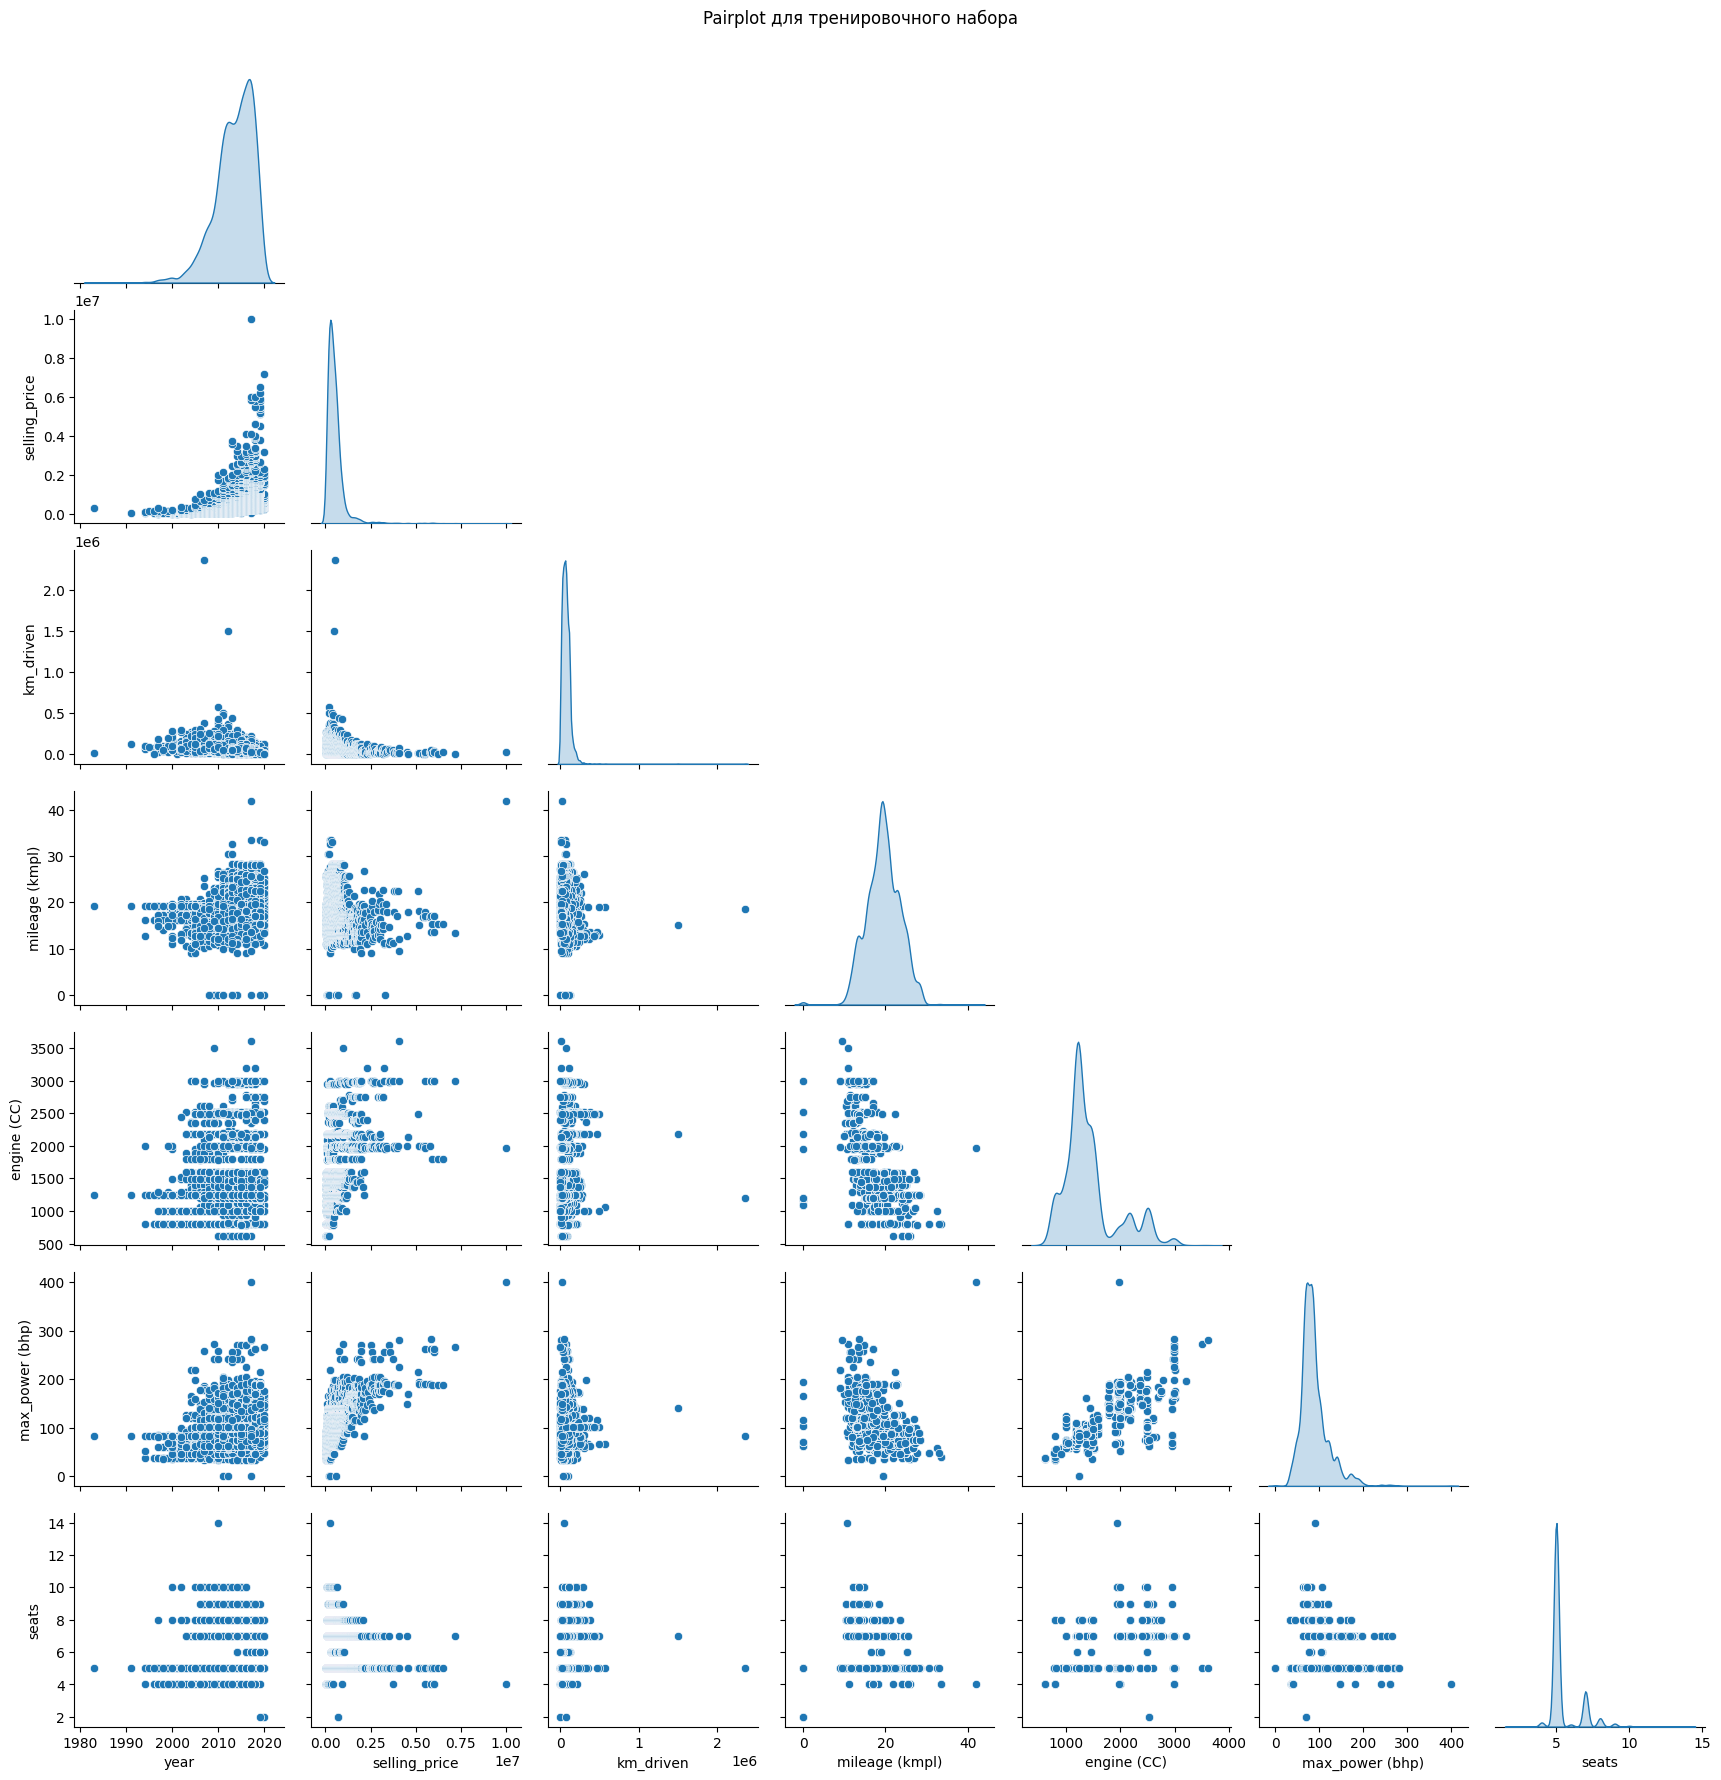

In [ ]:
plt.figure(figsize=(10, 8))
sns.pairplot(df_train, diag_kind="kde", markers="o", corner=True)
plt.suptitle("Pairplot для тренировочного набора", y=1.02)
plt.show()


<Figure size 1000x800 with 0 Axes>

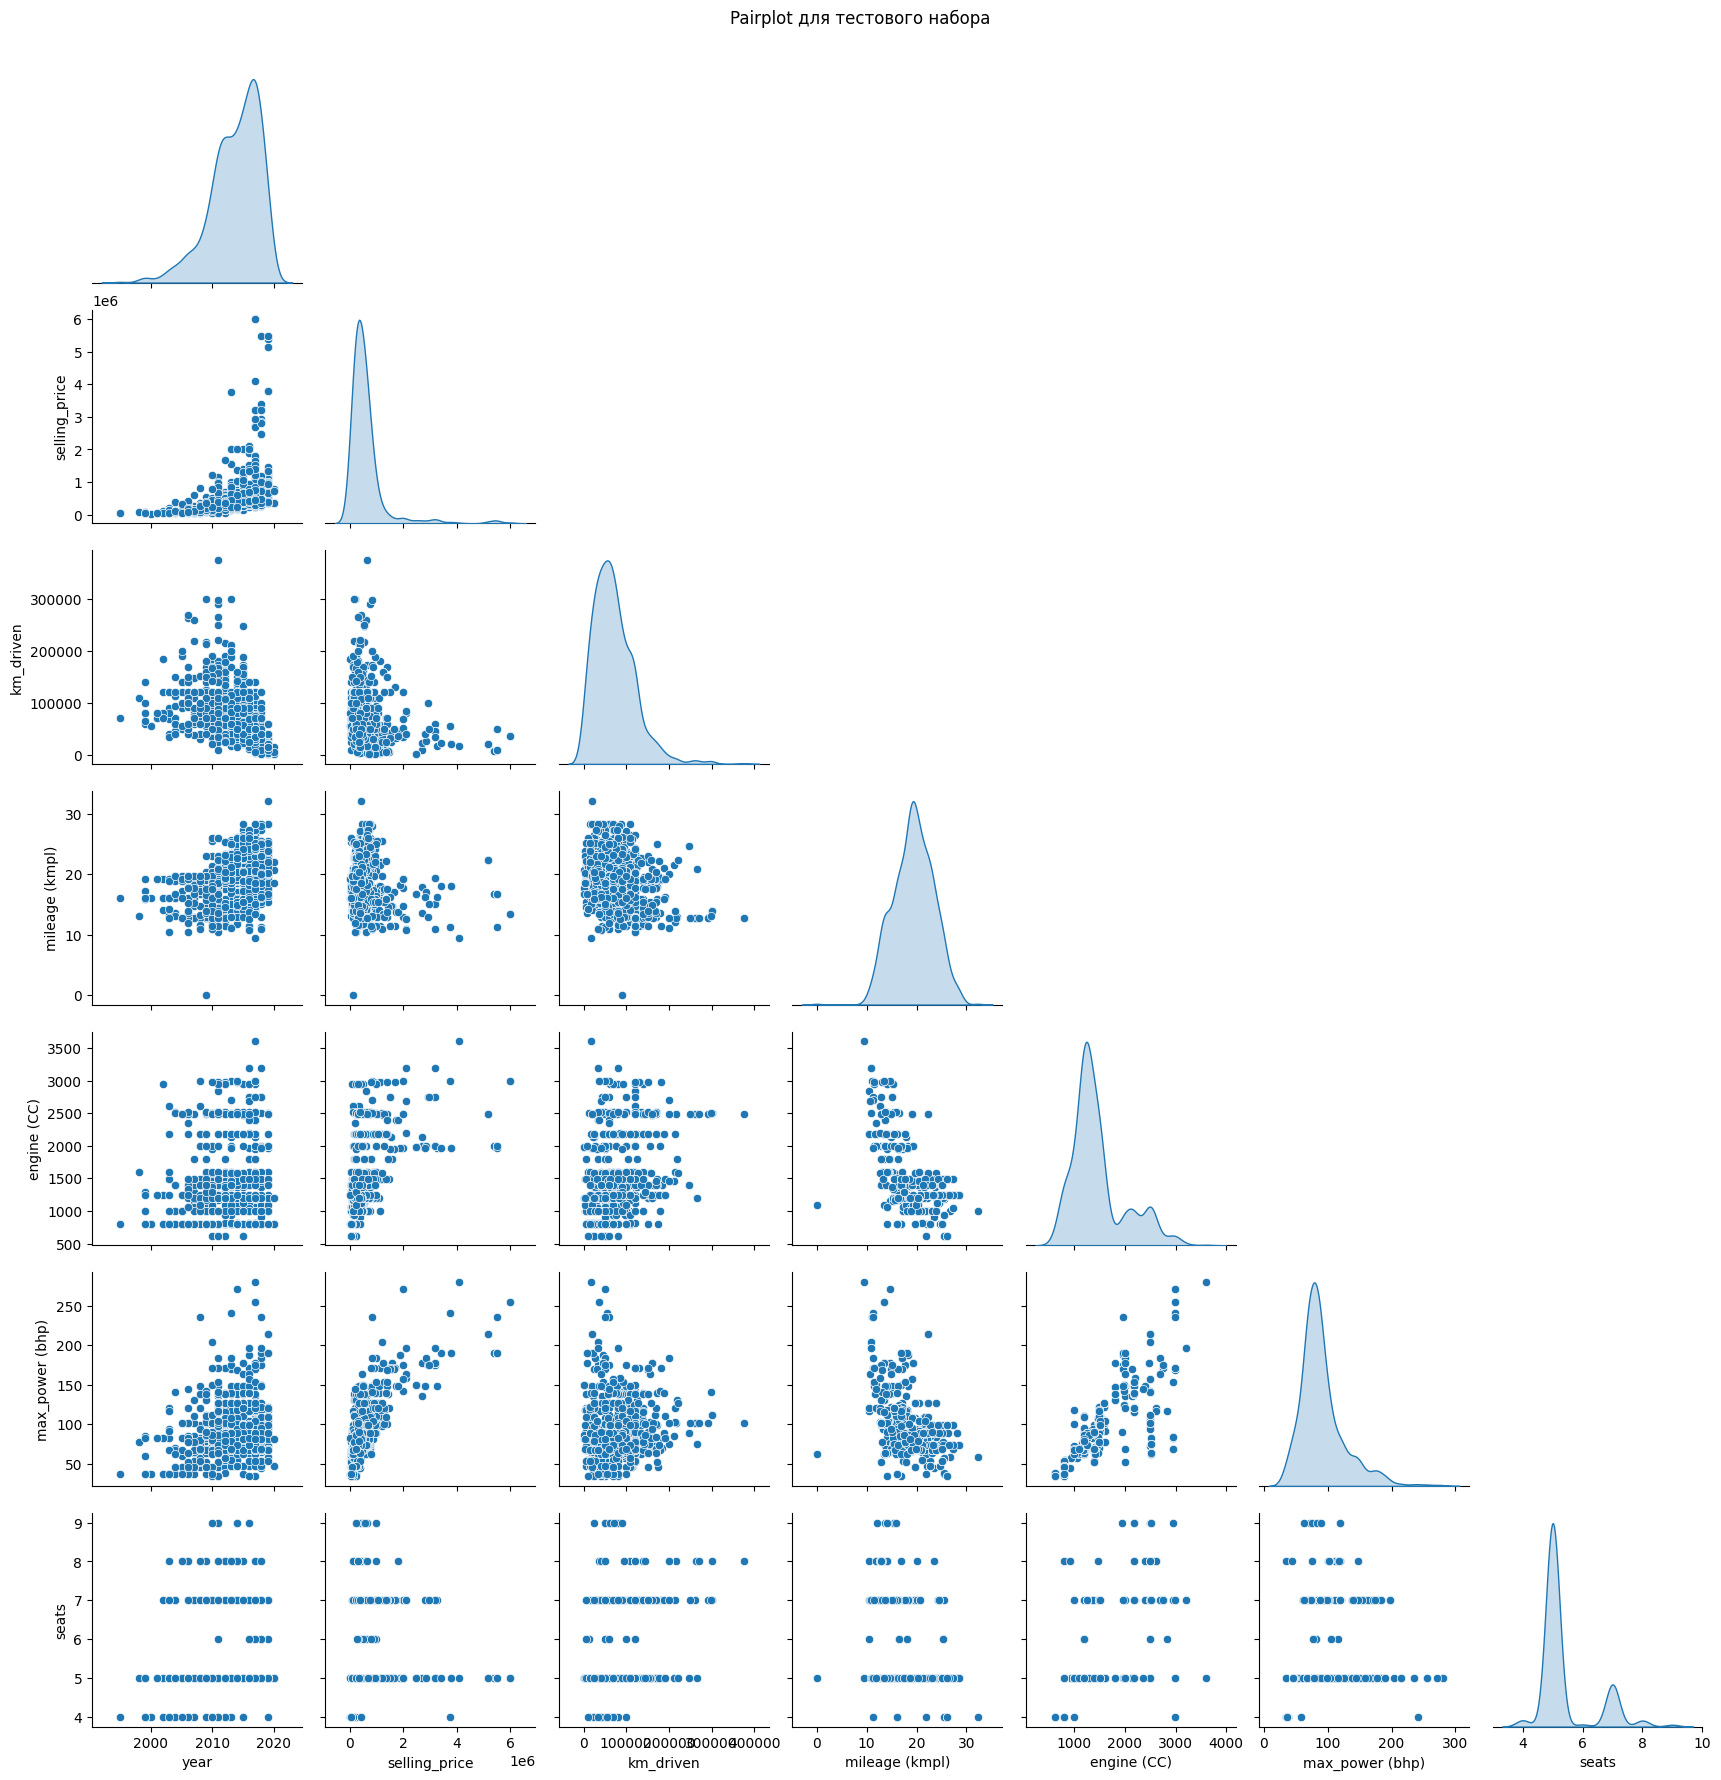

In [ ]:
plt.figure(figsize=(10, 8))
sns.pairplot(df_test, diag_kind="kde", markers="o", corner=True)
plt.suptitle("Pairplot для тестового набора", y=1.02)
plt.show()

1) Можно проследить положительную корреляцию между таргетом и переменными engine и max_power;
можно выдвинуть гипотезу о значимой корреляциипо модулю для нескольких пар переменных

2) графики для тренировочной и тестовой выборок выглядят схожими

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


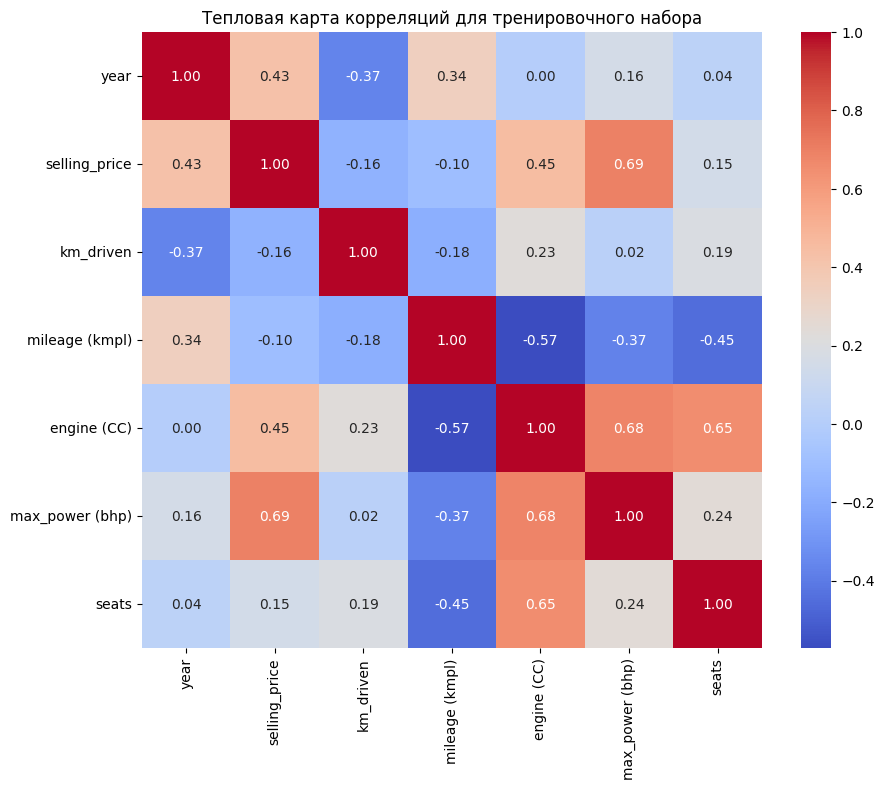

Наименее скоррелированные признаки: ('year', 'engine (CC)') с корреляцией 0.0028189953782184465
Сильные положительные корреляции (>= 0.65):
max_power (bhp)  selling_price    0.693181
                 engine (CC)      0.681082
engine (CC)      seats            0.652172
dtype: float64
Корреляция между годом выпуска (year) и пробегом (km_driven):
-0.36896578600116164


In [ ]:
numeric_columns = df_train.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Тепловая карта корреляций для тренировочного набора")
plt.show()

least_correlated = correlation_matrix.unstack().abs().sort_values(ascending=True).drop_duplicates()
print(f"Наименее скоррелированные признаки: {least_correlated.index[0]} с корреляцией {least_correlated.iloc[0]}")

strong_positive = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
strong_positive = strong_positive[(strong_positive >= 0.65) & (strong_positive < 1)]
print("Сильные положительные корреляции (>= 0.65):")
print(strong_positive)

print("Корреляция между годом выпуска (year) и пробегом (km_driven):")
print(correlation_matrix.loc['year', 'km_driven'])

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1.
#### Наименее скоррелированные признаки:
('year', 'engine (CC)') с корреляцией 0.0028189953782184465

2.
#### Сильные положительные корреляции (>= 0.65)

| Признак 1       | Признак 2       | Корреляция |
|------------------|-----------------|------------|
| `max_power (bhp)` | `selling_price` | 0.693181   |
| `engine (CC)`    | `max_power (bhp)`| 0.681082   |
| `engine (CC)`    | `seats`          | 0.652172   |

3.
Да, отрицательная корреляция, значение коэффициента можно приянть во внимание

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

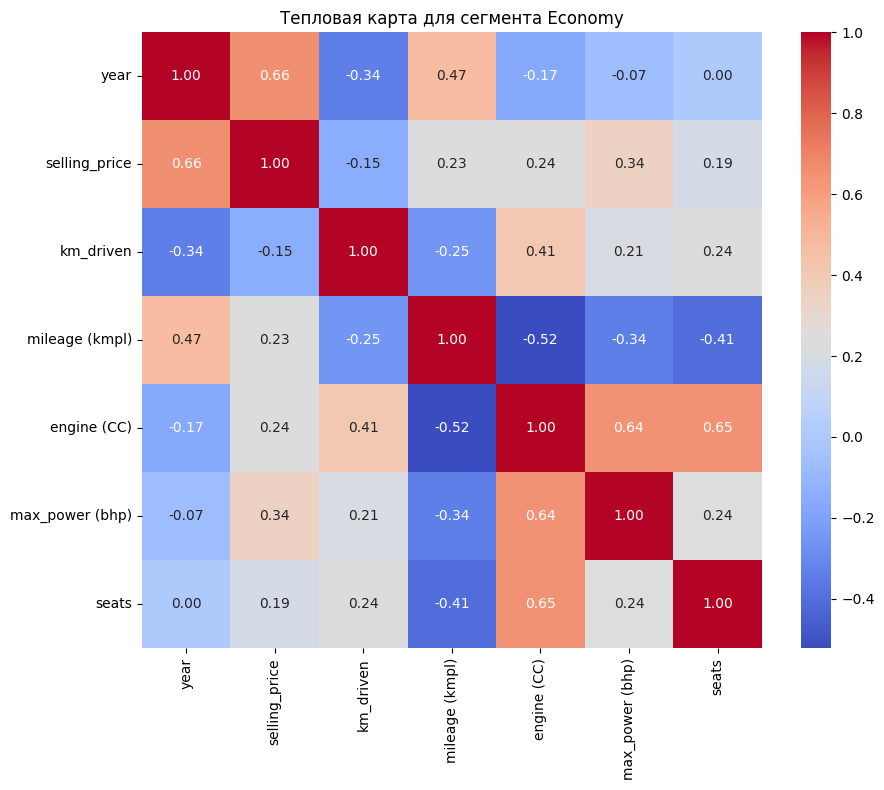

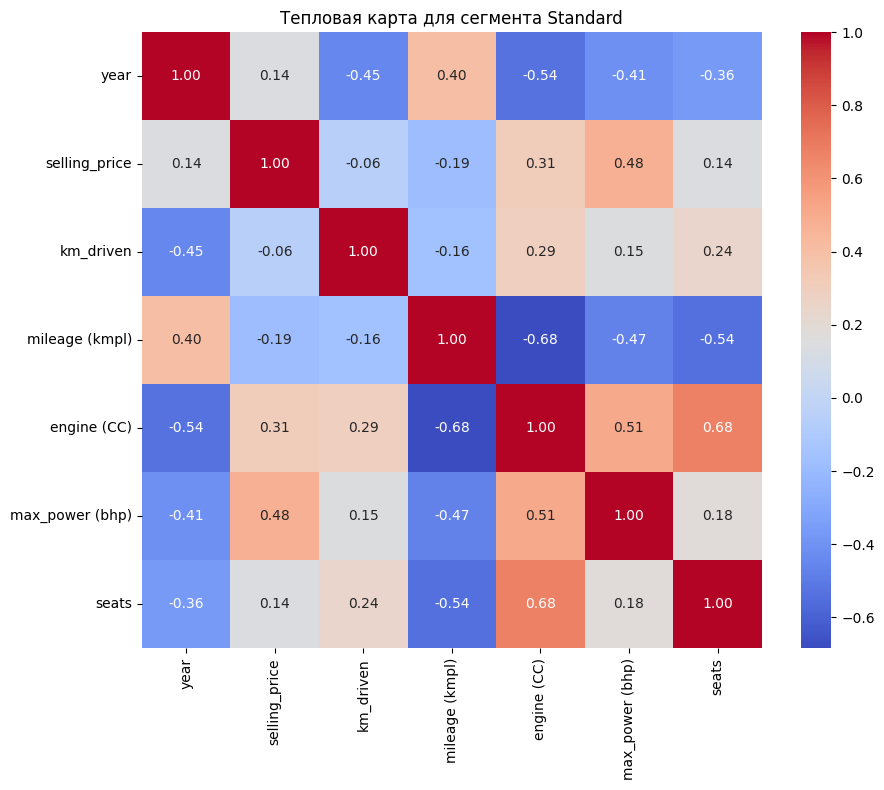

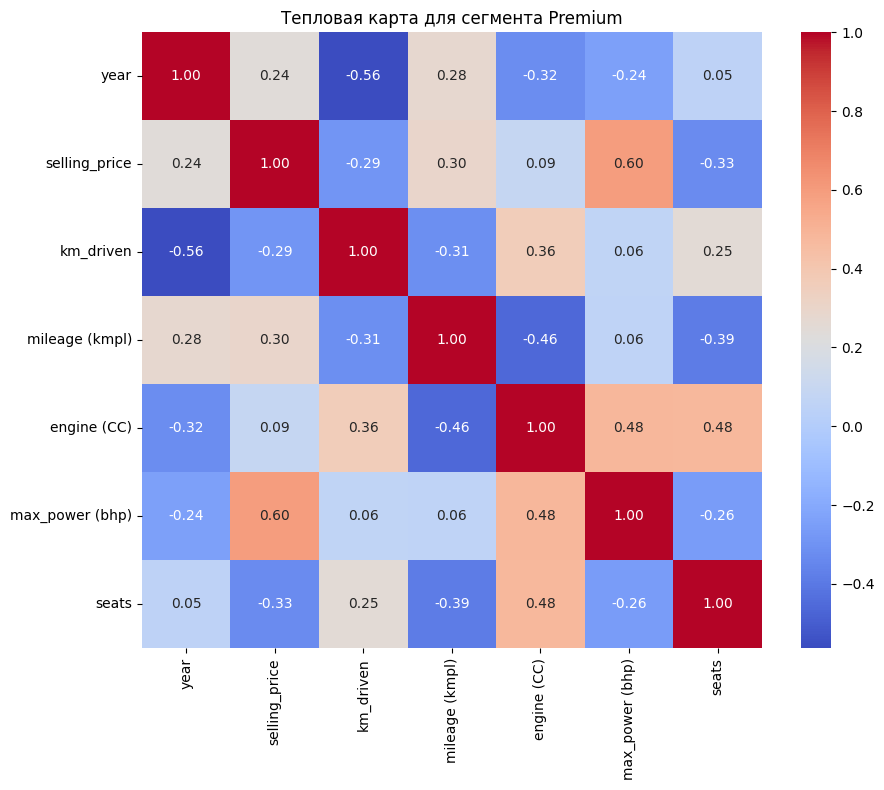

In [ ]:
# Тепловые карты для сегментов(классов автомобилей)

def classify_segment(price):
    if price < 500000:
        return 'Economy'
    elif price < 1500000:
        return 'Standard'
    else:
        return 'Premium'

segments = ['Economy', 'Standard', 'Premium']

for segment in segments:
    segment_data = df_train[df_train['selling_price'].apply(classify_segment) == segment]
    numeric_data = segment_data.select_dtypes(include=['number'])

    if numeric_data.empty:
        print(f"Нет данных для сегмента {segment}")
        continue

    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(f"Тепловая карта для сегмента {segment}")
    plt.show()

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [ ]:
train_copy = df_train.copy()
test_copy = df_test.copy()

X_train = train_copy.drop(columns=['name', 'fuel', 'seller_type', 'transmission', 'owner', 'selling_price'])
X_test = test_copy.drop(columns=['name', 'fuel', 'seller_type', 'transmission', 'owner', 'selling_price'])

y_train = train_copy['selling_price']
y_test = test_copy['selling_price']

assert X_train.shape == (5840, 6)
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)

print(f"R^2 для тренировки: {r2_train:.4f}, R^2 для теста: {r2_test:.4f}")
print(f"MSE для тренировки: {mse_train:.4f}, MSE для теста: {mse_test:.4f}")

R^2 для тренировки: 0.5929, R^2 для теста: 0.5938
MSE для тренировки: 116358947209.7674, MSE для теста: 233485544812.2653


Выводы по метрикам качества:

	1.	Коэффициент детерминации  R^2 :
	• модель объясняет около 59% дисперсии данных как для тренировочной, так и для тестовой выборки.
	•	Разница между  R^2  для тренировочной и тестовой выборки очень мала, что указывает на отсутствие переобучения. Модель достаточно стабильна на обеих выборках.
	2.	Среднеквадратическая ошибка (MSE):
	•	MSE для тренировочной выборки: 1.16e+10 (очень высокая из-за масштаба selling_price).
	•	MSE для тестовой выборки: 2.33e+10.
	•	Ошибка на тестовой выборке выше, чем на тренировочной, что указывает на наличие небольшого недообучения (или на более сложные тестовые данные).
	•	Однако масштаб ошибки обусловлен большими значениями целевой переменной (selling_price), поэтому для более точного анализа можно рассчитать RMSE (квадратный корень из MSE) или применить стандартизацию признаков.
	3.	Вывод:
	•	Модель демонстрирует умеренное качество предсказания.
	•	Можно попытаться улучшить модель, используя стандартизацию признаков (как указано в следующем задании) или добавив новые признаки, взаимодействия между ними или более сложные алгоритмы.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)

print(f"R^2 для тренировки: {r2_train:.4f}, R^2 для теста: {r2_test:.4f}")
print(f"MSE для тренировки: {mse_train:.4f}, MSE для теста: {mse_test:.4f}")

R^2 для тренировки: 0.5929, R^2 для теста: 0.5938
MSE для тренировки: 116358947209.7672, MSE для теста: 233485544812.2576


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [ ]:
feature_importance = pd.DataFrame({
    'Признак': X_train.columns,
    'Коэффициент': model.coef_
}).sort_values(by='Коэффициент', key=abs, ascending=False)

print(feature_importance)

           Признак    Коэффициент
4  max_power (bhp)  322270.229420
0             year  152795.477535
3      engine (CC)   61428.608984
1        km_driven  -44149.648971
2   mileage (kmpl)   28424.717857
5            seats  -23555.720593


Наиболее информативным признаком для предсказания цены автомобиля оказался max_power (bhp)

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [ ]:
from sklearn.linear_model import Lasso

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error as MSE

scaler_lasso = StandardScaler()
X_train_lasso_scaled = scaler_lasso.fit_transform(X_train)
X_test_lasso_scaled = scaler_lasso.transform(X_test)

lasso_model = Lasso(alpha=1.0, random_state=42)
lasso_model.fit(X_train_lasso_scaled, y_train)

y_train_lasso_pred = lasso_model.predict(X_train_lasso_scaled)
y_test_lasso_pred = lasso_model.predict(X_test_lasso_scaled)

r2_train_lasso = r2_score(y_train, y_train_lasso_pred)
r2_test_lasso = r2_score(y_test, y_test_lasso_pred)
mse_train_lasso = MSE(y_train, y_train_lasso_pred)
mse_test_lasso = MSE(y_test, y_test_lasso_pred)

print(f"R^2 для тренировочного набора (Lasso): {r2_train_lasso:.4f}")
print(f"R^2 для тестового набора (Lasso): {r2_test_lasso:.4f}")
print(f"MSE для тренировочного набора (Lasso): {mse_train_lasso:.4f}")
print(f"MSE для тестового набора (Lasso): {mse_test_lasso:.4f}")

lasso_coefficients = pd.DataFrame({
    'Признак': X_train.columns,
    'Коэффициент': lasso_model.coef_
}).sort_values(by='Коэффициент', key=abs, ascending=False)

print("\nКоэффициенты модели Lasso:")
print(lasso_coefficients)

zeroed_features = lasso_coefficients[lasso_coefficients['Коэффициент'] == 0]
print("\nПризнаки с зануленными коэффициентами:")
print(zeroed_features if not zeroed_features.empty else "Нет зануленных признаков")

R^2 для тренировочного набора (Lasso): 0.5929
R^2 для тестового набора (Lasso): 0.5938
MSE для тренировочного набора (Lasso): 116358947219.8802
MSE для тестового набора (Lasso): 233486217101.3997

Коэффициенты модели Lasso:
           Признак    Коэффициент
4  max_power (bhp)  322271.112335
0             year  152795.298992
3      engine (CC)   61423.777757
1        km_driven  -44148.520028
2   mileage (kmpl)   28422.835422
5            seats  -23552.843681

Признаки с зануленными коэффициентами:
Нет зануленных признаков


Выводы:

	1.	Качество моделей по R^2:
	•	Все три модели показывают одинаковый уровень объяснённой дисперсии (R^2) как на тренировочных, так и на тестовых данных.
	•	Это указывает на то, что стандартизация и применение Lasso-регрессии с текущим значением alpha = 1.0 не привели к улучшению качества по метрике R^2.
	2.	Качество моделей по MSE:
	•	Значения MSE также практически идентичны для всех трёх моделей. Разница составляет лишь доли, что связано с округлением.
	3.	Эффект Lasso-регрессии:
	•	Несмотря на добавление регуляризации в Lasso, качество модели осталось прежним. Это связано с тем, что текущий уровень регуляризации (alpha) оказался недостаточно сильным для значительного влияния на модель.
	4.	Рекомендации:
	•	Для проверки потенциального преимущества Lasso-регрессии необходимо провести настройку параметра alpha (например, с помощью GridSearchCV) и протестировать, как это влияет на метрики качества.


In [33]:
import pickle

# Подготовка данных для сохранения
model_data = {
    "model": lasso_model,  # Обученная модель Lasso
    "scaler": scaler_lasso,  # Объект StandardScaler
    "features": list(X_train.columns),  # Список имен признаков
    "coefficients": lasso_model.coef_,  # Коэффициенты модели
}

# Сохранение данных в pickle файл
with open("lasso_model_data.pickle", "wb") as file:
    pickle.dump(model_data, file)

print("Модель, скейлер и данные сохранены в lasso_model_data.pickle")


Модель, скейлер и данные сохранены в lasso_model_data.pickle


In [34]:
import pandas as pd

# Создание данных для CSV-файла
data = {
    "year": [2017, 2019],
    "km_driven": [10000, 20000],
    "mileage": [20.14, 18.0],
    "engine": [4000, 3500],
    "max_power": [400, 320],
    "seats": [5, 5]
}

# Преобразование данных в DataFrame
df = pd.DataFrame(data)

# Сохранение DataFrame в CSV-файл
file_name = "test_data.csv"
df.to_csv(file_name, index=False)

print(f"CSV-файл '{file_name}' успешно создан!")

CSV-файл 'test_data.csv' успешно создан!


### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Стандартизация признаков
scaler_lasso = StandardScaler()
X_train_scaled = scaler_lasso.fit_transform(X_train)
X_test_scaled = scaler_lasso.transform(X_test)

# Определение сетки параметров для Lasso
param_grid_lasso = {
    'alpha': np.logspace(-3, 3, 10)  # Логарифмическая шкала значений alpha
}

# Инициализация модели Lasso
lasso = Lasso(random_state=42, max_iter=10000)

# Инициализация GridSearchCV
grid_lasso = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid_lasso,
    cv=10,  # 10-фолдовая кросс-валидация
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Обучение GridSearchCV
grid_lasso.fit(X_train_scaled, y_train)

# Получение лучших параметров и модели
best_lasso_params = grid_lasso.best_params_
best_lasso_r2 = grid_lasso.best_score_
best_lasso_model = grid_lasso.best_estimator_

# Предсказания и метрики
y_train_lasso_pred = best_lasso_model.predict(X_train_scaled)
y_test_lasso_pred = best_lasso_model.predict(X_test_scaled)

r2_train_lasso = r2_score(y_train, y_train_lasso_pred)
r2_test_lasso = r2_score(y_test, y_test_lasso_pred)
mse_train_lasso = mean_squared_error(y_train, y_train_lasso_pred)
mse_test_lasso = mean_squared_error(y_test, y_test_lasso_pred)

print(f"Лучшие параметры для Lasso: {best_lasso_params}")
print(f"Лучший R^2 на кросс-валидации для Lasso: {best_lasso_r2:.4f}")
print(f"R^2 для тренировочного набора Lasso: {r2_train_lasso:.4f}, R^2 для тестового набора Lasso: {r2_test_lasso:.4f}")
print(f"MSE для тренировочного набора Lasso: {mse_train_lasso:.4f}, MSE для тестового набора Lasso: {mse_test_lasso:.4f}")

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Лучшие параметры для Lasso: {'alpha': 1000.0}
Лучший R^2 на кросс-валидации для Lasso: -92.2979
R^2 для тренировочного набора Lasso: 0.5929, R^2 для тестового набора Lasso: 0.5926
MSE для тренировочного набора Lasso: 116368797984.8733, MSE для тестового набора Lasso: 234165800559.3279


Fitting 10 folds for each of 20 candidates, totalling 200 fits


<ipython-input-20-f1dad1720eb2>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grid_results_display.rename(columns={


Обучено моделей: 200
Лучший коэффициент регуляризации (alpha): 1000.0
Лучший R^2 на кросс-валидации: -92.2979
Количество зануленных коэффициентов: 0


,Alpha,Mean R^2,Std R^2
19,1000.0000,-92.2979,61.9148
18,483.2930,-92.7552,62.2968
17,233.5721,-92.9788,62.4832
16,112.8838,-93.0878,62.5741
15,54.5559,-93.1408,62.6183
14,26.3665,-93.1665,62.6396
13,12.7427,-93.1789,62.6500
12,6.1585,-93.1850,62.6551
11,2.9764,-93.1879,62.6575
10,1.4384,-93.1893,62.6587


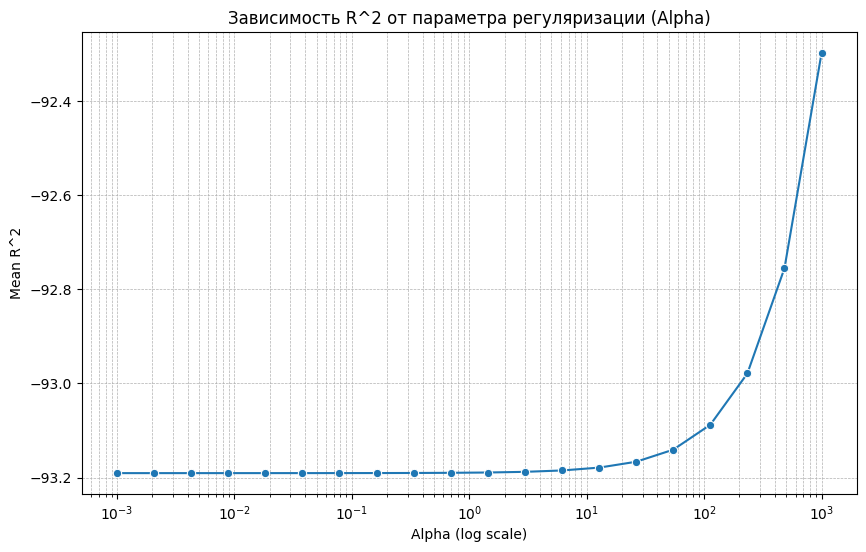

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Определение сетки параметров
param_grid_lasso = {
    'alpha': np.logspace(-3, 3, 20)
}


lasso_model = Lasso(random_state=42, max_iter=10000)

# Инициализация GridSearchCV
grid_search = GridSearchCV(
    estimator=lasso_model,
    param_grid=param_grid_lasso,
    scoring='r2',
    cv=10,
    verbose=1,
    n_jobs=-1
)


grid_search.fit(X_train_scaled, y_train)


best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

total_models = len(param_grid_lasso['alpha']) * 10

# Таблица с результатами GridSearchCV
grid_results = pd.DataFrame(grid_search.cv_results_).sort_values(by="mean_test_score", ascending=False)
grid_results_display = grid_results[["param_alpha", "mean_test_score", "std_test_score"]]
grid_results_display.rename(columns={
    "param_alpha": "Alpha",
    "mean_test_score": "Mean R^2",
    "std_test_score": "Std R^2"
}, inplace=True)

# Проверка зануленных коэффициентов
best_model_coefficients = best_model.coef_
num_zero_coefficients = sum(best_model_coefficients == 0)


print(f"Обучено моделей: {total_models}")
print(f"Лучший коэффициент регуляризации (alpha): {best_params['alpha']}")
print(f"Лучший R^2 на кросс-валидации: {best_score:.4f}")
print(f"Количество зануленных коэффициентов: {num_zero_coefficients}")
display(grid_results_display.style.set_caption("Результаты GridSearchCV").background_gradient(cmap="Blues").format(precision=4))


plt.figure(figsize=(10, 6))
sns.lineplot(
    x="Alpha", y="Mean R^2",
    data=grid_results_display.sort_values(by="Alpha"),
    marker="o"
)
plt.xscale("log")
plt.title("Зависимость R^2 от параметра регуляризации (Alpha)")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Mean R^2")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [ ]:
from sklearn.linear_model import ElasticNet

param_grid_elastic = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.2, 0.5, 0.8]
}
elastic = ElasticNet(random_state=42)

grid_elastic = GridSearchCV(estimator=elastic, param_grid=param_grid_elastic, cv=10, scoring='r2')
grid_elastic.fit(X_train_scaled, y_train)

best_elastic_params = grid_elastic.best_params_
best_elastic_r2 = grid_elastic.best_score_
elastic_best_model = grid_elastic.best_estimator_

y_train_elastic_pred = elastic_best_model.predict(X_train_scaled)
y_test_elastic_pred = elastic_best_model.predict(X_test_scaled)

r2_train_elastic = r2_score(y_train, y_train_elastic_pred)
r2_test_elastic = r2_score(y_test, y_test_elastic_pred)
mse_train_elastic = MSE(y_train, y_train_elastic_pred)
mse_test_elastic = MSE(y_test, y_test_elastic_pred)

zeroed_features_elastic = (elastic_best_model.coef_ == 0).sum()

print(f"Лучшие параметры для ElasticNet: {best_elastic_params}")
print(f"Лучший R^2 на кросс-валидации для ElasticNet: {best_elastic_r2:.4f}")
print(f"R^2 для тренировочного набора ElasticNet: {r2_train_elastic:.4f}, R^2 для тестового набора ElasticNet: {r2_test_elastic:.4f}")
print(f"MSE для тренировочного набора ElasticNet: {mse_train_elastic:.4f}, MSE для тестового набора ElasticNet: {mse_test_elastic:.4f}")
print(f"Количество занулённых коэффициентов в ElasticNet: {zeroed_features_elastic}")

Лучшие параметры для ElasticNet: {'alpha': 1, 'l1_ratio': 0.2}
Лучший R^2 на кросс-валидации для ElasticNet: -54.2317
R^2 для тренировочного набора ElasticNet: 0.5083, R^2 для тестового набора ElasticNet: 0.4459
MSE для тренировочного набора ElasticNet: 140553734032.5327, MSE для тестового набора ElasticNet: 318491704856.2927
Количество занулённых коэффициентов в ElasticNet: 0


1.
	•	Для сетки параметров alpha: [0.01, 0.1, 1, 10, 100] и l1_ratio: [0.2, 0.5, 0.8] с использованием 10-кратной кросс-валидации:
	•	Количество моделей =  5 * 3 * 10 = 150 .
2.
	•	Лучшие параметры: {'alpha': 1, 'l1_ratio': 0.2}.
3.
	•	Количество занулённых коэффициентов: 0.

  

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [ ]:
df_train_dropped = df_train.drop(columns=['name'])
df_test_dropped = df_test.drop(columns=['name'])


print("Тренировочный набор после удаления столбца `name`:")
print(df_train_dropped.head())

print("\nТестовый набор после удаления столбца `name`:")
print(df_test_dropped.head())

Тренировочный набор после удаления столбца `name`:
   year  selling_price  km_driven    fuel seller_type transmission  \
0  1997          29999      80000  Petrol  Individual       Manual   
1  2001          30000      10000  Petrol  Individual       Manual   
2  2000          30000      90000  Petrol  Individual       Manual   
3  2004          31504     110000  Petrol  Individual       Manual   
4  1998          35000      40000  Petrol  Individual       Manual   

          owner  mileage (kmpl)  engine (CC)  max_power (bhp)  seats  
0   Third Owner            16.1          796             37.0      4  
1   First Owner            17.3          993             60.0      5  
2   Third Owner            19.3         1248             82.0      5  
3   Third Owner            16.1          796             37.0      4  
4  Second Owner            16.1          796             37.0      4  

Тестовый набор после удаления столбца `name`:
   year  selling_price  km_driven    fuel seller_type t

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [ ]:
assert X_train_cat.shape == (5840, 10)

In [ ]:
X_train_cat.describe(include='object')

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['owner', 'fuel', 'seller_type', 'transmission', 'seats']

ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

X_train_cat = ohe.fit_transform(df_train_dropped[categorical_features])
X_test_cat = ohe.transform(df_test_dropped[categorical_features])

encoded_columns = ohe.get_feature_names_out(categorical_features)

X_train_cat = pd.DataFrame(X_train_cat, columns=encoded_columns, index=df_train_dropped.index)
X_test_cat = pd.DataFrame(X_test_cat, columns=encoded_columns, index=df_test_dropped.index)

df_train_encoded = pd.concat([df_train_dropped.drop(columns=categorical_features), X_train_cat], axis=1)
df_test_encoded = pd.concat([df_test_dropped.drop(columns=categorical_features), X_test_cat], axis=1)

print("Размер тренировочного набора после кодирования:", df_train_encoded.shape)
print("Размер тестового набора после кодирования:", df_test_encoded.shape)

Размер тренировочного набора после кодирования: (5840, 24)
Размер тестового набора после кодирования: (1000, 24)


In [ ]:
df_train_encoded.head()

,year,selling_price,km_driven,mileage (kmpl),engine (CC),max_power (bhp),owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,...,seller_type_Trustmark Dealer,transmission_Manual,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,1997,29999,80000,16.1,796,37.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2001,30000,10000,17.3,993,60.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2000,30000,90000,19.3,1248,82.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2004,31504,110000,16.1,796,37.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1998,35000,40000,16.1,796,37.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

Ridge-регрессия — наилучший выбор среди рассмотренных моделей, так как даёт лучшее соотношение  R^2  и MSE на тестовых данных

In [29]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd


target = 'selling_price'
numerical_features = ['year', 'km_driven', 'mileage (kmpl)', 'engine (CC)', 'max_power (bhp)']  # seats исключен


categorical_features = [col for col in df_train_encoded.columns if col not in numerical_features + [target]]


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_train_encoded[numerical_features])
X_test_scaled = scaler.transform(df_test_encoded[numerical_features])


X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_features, index=df_train_encoded.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_features, index=df_test_encoded.index)


X_train_final = pd.concat([X_train_scaled, df_train_encoded[categorical_features]], axis=1)
X_test_final = pd.concat([X_test_scaled, df_test_encoded[categorical_features]], axis=1)


y_train = df_train_encoded[target]
y_test = df_test_encoded[target]


param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge(random_state=42)
grid_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=10, scoring='r2')
grid_ridge.fit(X_train_final, y_train)


best_ridge_params = grid_ridge.best_params_
best_ridge_r2 = grid_ridge.best_score_
ridge_best_model = grid_ridge.best_estimator_


y_train_ridge_pred = ridge_best_model.predict(X_train_final)
y_test_ridge_pred = ridge_best_model.predict(X_test_final)

r2_train_ridge = r2_score(y_train, y_train_ridge_pred)
r2_test_ridge = r2_score(y_test, y_test_ridge_pred)

mse_train_ridge = mean_squared_error(y_train, y_train_ridge_pred)
mse_test_ridge = mean_squared_error(y_test, y_test_ridge_pred)

# Вывод результатов
print(f"Лучшие параметры для Ridge: {best_ridge_params}")
print(f"Лучший R^2 на кросс-валидации для Ridge: {best_ridge_r2:.4f}")
print(f"R^2 для тренировочного набора Ridge: {r2_train_ridge:.4f}, R^2 для тестового набора Ridge: {r2_test_ridge:.4f}")
print(f"MSE для тренировочного набора Ridge: {mse_train_ridge:.4f}, MSE для тестового набора Ridge: {mse_test_ridge:.4f}")


Лучшие параметры для Ridge: {'alpha': 10}
Лучший R^2 на кросс-валидации для Ridge: -76.4476
R^2 для тренировочного набора Ridge: 0.6547, R^2 для тестового набора Ridge: 0.6453
MSE для тренировочного набора Ridge: 98697734506.3087, MSE для тестового набора Ridge: 203915611571.3758


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
# Реализация бизнес-метрики
def business_metric(y_true, y_pred):
    within_10_percent = np.abs((y_true - y_pred) / y_true) <= 0.1
    return np.mean(within_10_percent) * 100

# Расчёт метрики для Linear Regression
linear_metric_train = business_metric(y_train, y_train_pred)
linear_metric_test = business_metric(y_test, y_test_pred)

# Расчёт метрики для Lasso
lasso_metric_train = business_metric(y_train, y_train_lasso_pred)
lasso_metric_test = business_metric(y_test, y_test_lasso_pred)

# Расчёт метрики для ElasticNet
elastic_metric_train = business_metric(y_train, y_train_elastic_pred)
elastic_metric_test = business_metric(y_test, y_test_elastic_pred)

# Расчёт метрики для Ridge
ridge_metric_train = business_metric(y_train, y_train_ridge_pred)
ridge_metric_test = business_metric(y_test, y_test_ridge_pred)


print("Бизнес-метрики для моделей:")
print(f"Linear Regression - Train: {linear_metric_train:.2f}%, Test: {linear_metric_test:.2f}%")
print(f"Lasso Regression - Train: {lasso_metric_train:.2f}%, Test: {lasso_metric_test:.2f}%")
print(f"ElasticNet Regression - Train: {elastic_metric_train:.2f}%, Test: {elastic_metric_test:.2f}%")
print(f"Ridge Regression - Train: {ridge_metric_train:.2f}%, Test: {ridge_metric_test:.2f}%")

Бизнес-метрики для моделей:
Linear Regression - Train: 21.59%, Test: 22.60%
Lasso Regression - Train: 21.63%, Test: 22.70%
ElasticNet Regression - Train: 20.60%, Test: 24.50%
Ridge Regression - Train: 21.97%, Test: 25.30%


Ridge Regression показала наилучший результат как на тренировочном (21.97%), так и на тестовом (25.30%) наборах данных.

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

